In [1]:
cd

C:\Users\56961


In [2]:
cd Desktop\portafolio

C:\Users\56961\Desktop\portafolio


In [3]:
get_ipython().magic('reset -sf')

C:\Users\56961\AppData\Local\Temp\ipykernel_18724\3674724974.py:1: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [4]:

# cargar librerias

# definir librerias
import random
import numpy as np
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import networkx as nx
import pickle 
from collections import Counter
import csv
import scipy.stats as st

import networkx.algorithms.isomorphism as iso

import scipy.io as sio
import numpy as np
from datetime import datetime

import seaborn as sns
import pandas as pd
import numpy as np
import io

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import warnings
warnings.filterwarnings('ignore')


C:\Users\56961\AppData\Local\Temp\ipykernel_18724\2093908240.py:31: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [5]:
name_df= "data frame/data_frame_sin_falsos"

file = open(name_df, 'rb')
df_experimentacion= pickle.load(file)
file.close()

df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("PIMPLE", "PIMLE")
df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("EMV", "MLE")
df_experimentacion

df_experimentacion.head(2)

,Id_grafo,Tipo_grafo,Metodo_infeccion,Porc_infectados,Tipo_sample_p_gral,Porc_nodos_muestra,Num_metodo_est,Valor_Estimado,Valor_error(Exac - Est),Valor_error_rel(Exac - Est),Densidad,Parametro
0,0,escala,1,0.01,5,0.01,PIMLE,66.883480,-6.883480,-0.114725,10%,676
1,0,escala,1,0.01,5,0.01,MLE,67.176549,-7.176549,-0.119609,10%,676


# Inicio de graficas 

In [6]:
def graficar_IC_Present(df_contexto,size_inf,factor,L_localization):
    # fila, columna
    Tipo_sample_p_gral=["5","6","7","8"]
    dict_rc_to_sample={(u,v):sample for (u,v),sample in zip([(0,0),(0,1),(1,0),(1,1)] ,Tipo_sample_p_gral) }
    dict_localitation_Legend={(u,v):sample for (u,v),sample in zip([(0,0),(0,1),(1,0),(1,1)] ,L_localization) }    
    
    # grafica i #
    L_met_est=['PIMLE','MLE','GNSUM','RDS_I','RDS_II']   
    cant_graficas=len(L_met_est)
    dict_num_row_to_est={u:v for u,v in zip(range(cant_graficas),L_met_est)}
    
    l_ancho=[2.5,2.5,2.5,2.5,2.5]
    dict_met_to_ancho={u:v for u,v in zip(L_met_est,l_ancho)}    
    
    Lalfa=[0.5,0.5,1,1,1]    
    dict_met_to_alfa={u:v for u,v in zip(L_met_est,Lalfa)}    
    
    # dominio x
    l_porc_sample=[0.01,0.1, 0.5 , 0.9]  # x dominio # listo
    x_dom=l_porc_sample
    
    fig, axes = plt.subplots(2,2, figsize=size_figure, sharex=False, sharey=False)    
    fig.suptitle("Aproximación intervalo de confianza al 95% (Experimento "+NumExp+").")    
    
    for num_row in range(2):    
        for num_col in range(2):   
            sample=dict_rc_to_sample[num_row,num_col]
            cond_sample=df_contexto["Tipo_sample_p_gral"]==sample
            df_sample=df_contexto[cond_sample]
            
            for i in range(cant_graficas): # metodo estimador
                metodo_est=L_met_est[i]
                df_graphics=df_sample[df_sample["Num_metodo_est"]==metodo_est]
                

                lista_mean=[]
                l_up_estimador=[]
                for porc_sample in l_porc_sample: # x dom 
                    df_x=df_graphics[df_graphics["Porc_nodos_muestra"]==porc_sample]                
                    datos=list(df_x["Valor_error_rel(Exac - Est)"])                

                    mean_datos=np.mean(datos)
                    lista_mean.append(mean_datos)
                    IC_fix_porc_inf=list(st.t.interval(0.95, len(datos)-1, loc=mean_datos, scale=st.sem(datos)))    
                    up_fix_porc_inf=IC_fix_porc_inf[1]-mean_datos
                    l_up_estimador.append(up_fix_porc_inf/factor)
                name_label=metodo_est
                
                axes[num_row,num_col].scatter(x_dom,lista_mean,s=5,marker='o',label=name_label)   #list_marker=['^','o',"1"]    
                
                ancho=dict_met_to_ancho[metodo_est]
                PAlfa=dict_met_to_alfa[metodo_est]
                axes[num_row,num_col].errorbar(x_dom, lista_mean, yerr=l_up_estimador, fmt='-',alpha=PAlfa,linewidth=ancho)
                if True: #if metodo_est=="RDS_II" or metodo_est=="RDS_I":
                    line = axes[num_row,num_col].get_lines()[-1]# Obtén la línea del gráfico actual
                    line.set_linestyle("-.")# Cambia el estilo de la línea a punteado                
                    line.set_alpha(0.4)                    
                axes[num_row,num_col].grid(True) 

                ylabel="Err. Rel con porc. H="+str(size_inf)+"."
                axes[num_row,num_col].set_ylabel(ylabel,fontsize=14)
                xlabel="Prop. de muestra con resp. a N."
                axes[num_row,num_col].set_xlabel(xlabel,fontsize=14)

                Titulo="IC de la Esp. Er. rel para TM "+str(sample)
                axes[num_row,num_col].set_title(Titulo)
                if False:
                    localization=dict_localitation_Legend[num_row,num_col]
                    axes[num_row,num_col].legend(loc=localization,prop={'size': 10}, title ='Mét. estimadores:', framealpha=0.1)
                #axes[num_row,num_col].set_xlim([-0.1, 1.2])
                #axes[num_row,num_col].set_ylim(ylim)
    plt.tight_layout()  
    
    

# H generado a través de un muestreo uniforme.

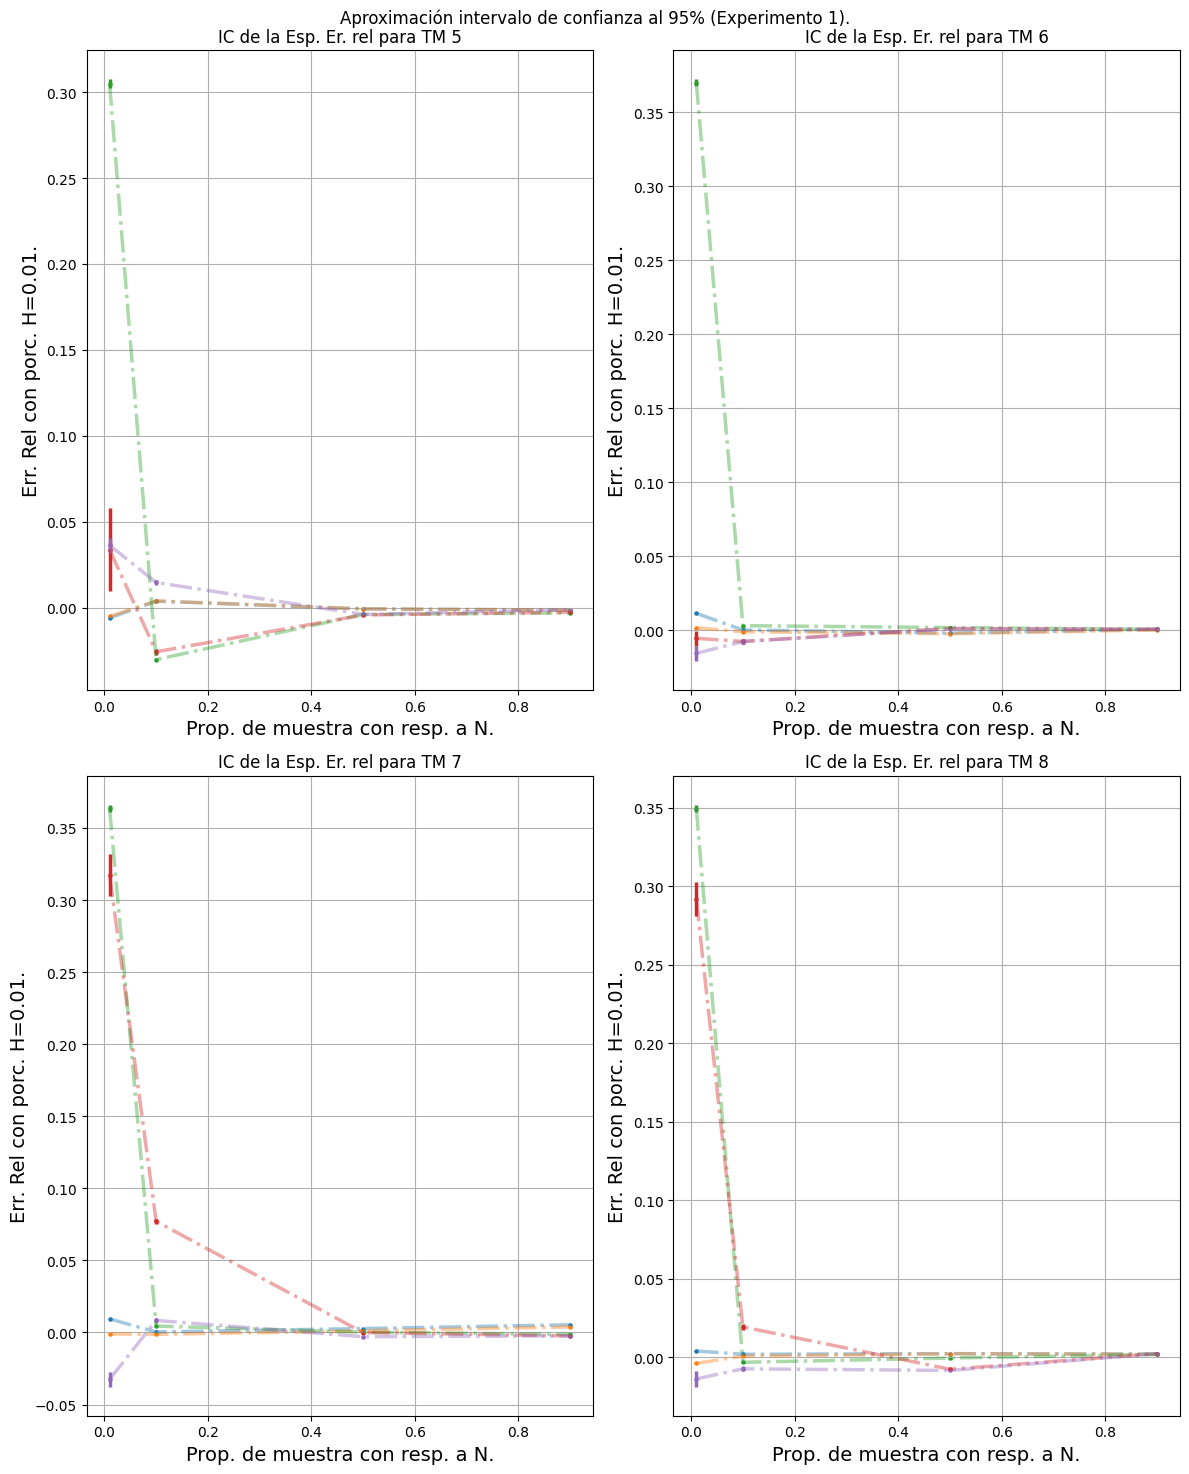

In [133]:
cond1=df_experimentacion["Metodo_infeccion"]=="1"
cond2=df_experimentacion["Porc_infectados"]==0.01
df_contexto=df_experimentacion[cond1 & cond2]


size_figure=(12,15)
L_localization=['upper right','upper right','upper right','upper right']
NumExp="1"
factor=10
L_prop_sample=[0.01,0.1,0.5,0.9]
size_inf="0.01"
default_colors=graficar_IC_Present(df_contexto,size_inf,factor,L_localization)

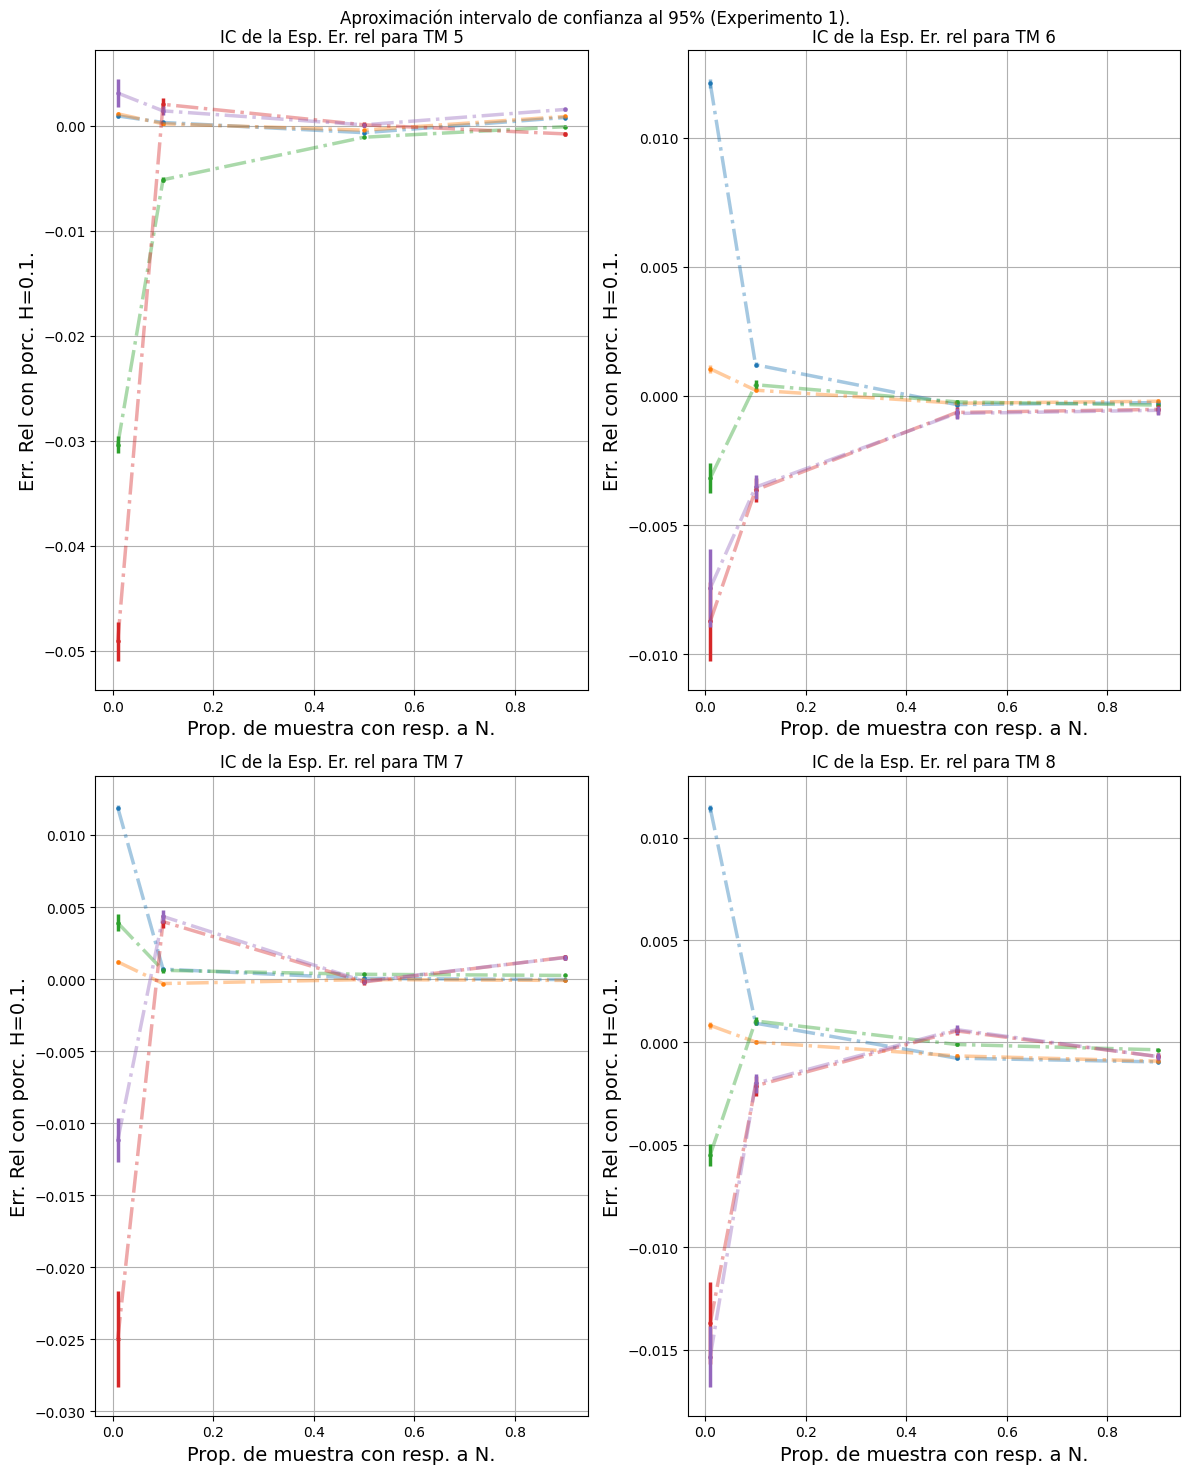

In [7]:

cond1=df_experimentacion["Metodo_infeccion"]=="1"
cond2=df_experimentacion["Porc_infectados"]==0.1
df_contexto=df_experimentacion[cond1 & cond2]


size_figure=(12,15)
L_localization=['lower right','upper right','upper right','upper right']
NumExp="1"
factor=10
L_prop_sample=[0.01,0.1,0.5,0.9]
size_inf="0.1"
graficar_IC_Present(df_contexto,size_inf,factor,L_localization)

# H generado DP .

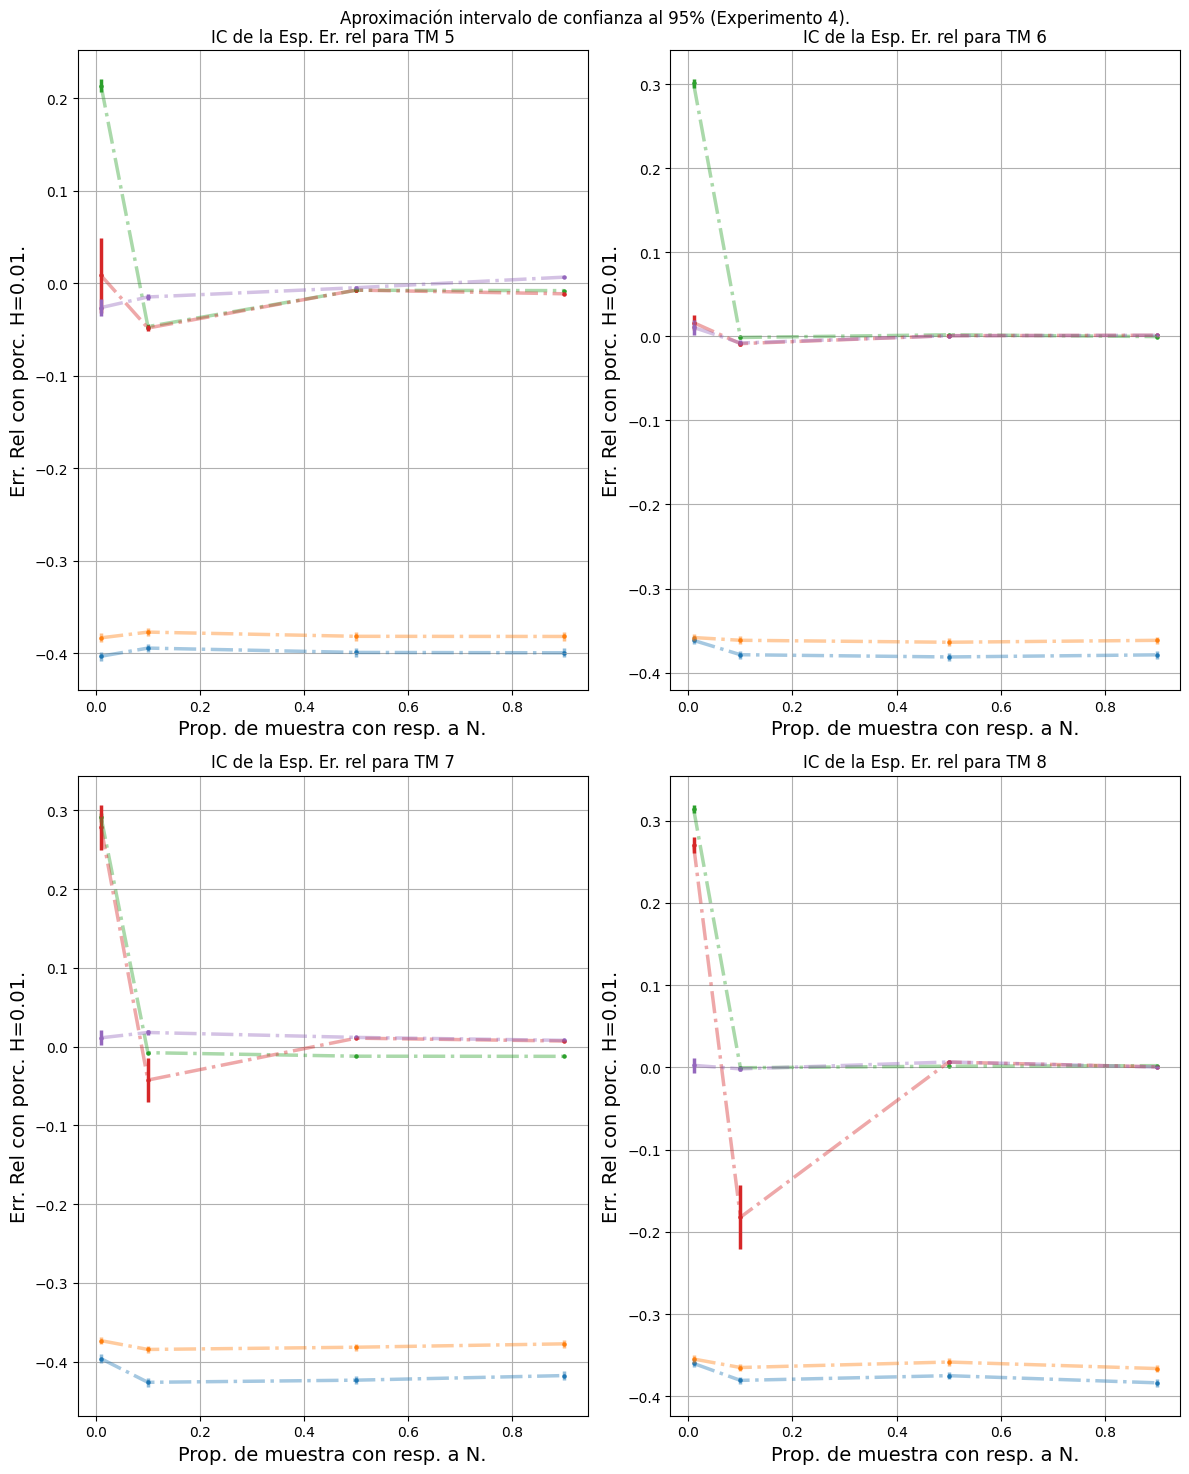

In [135]:
cond1=df_experimentacion["Metodo_infeccion"]=="DP"
cond2=df_experimentacion["Porc_infectados"]==0.01
df_contexto=df_experimentacion[cond1 & cond2]

size_figure=(12,15)
L_localization=['upper right','upper right','upper right','upper right']
NumExp="4"

L_prop_sample=[0.01,0.1,0.5,0.9]
size_inf="0.01"
factor=5
graficar_IC_Present(df_contexto,size_inf,factor,L_localization)

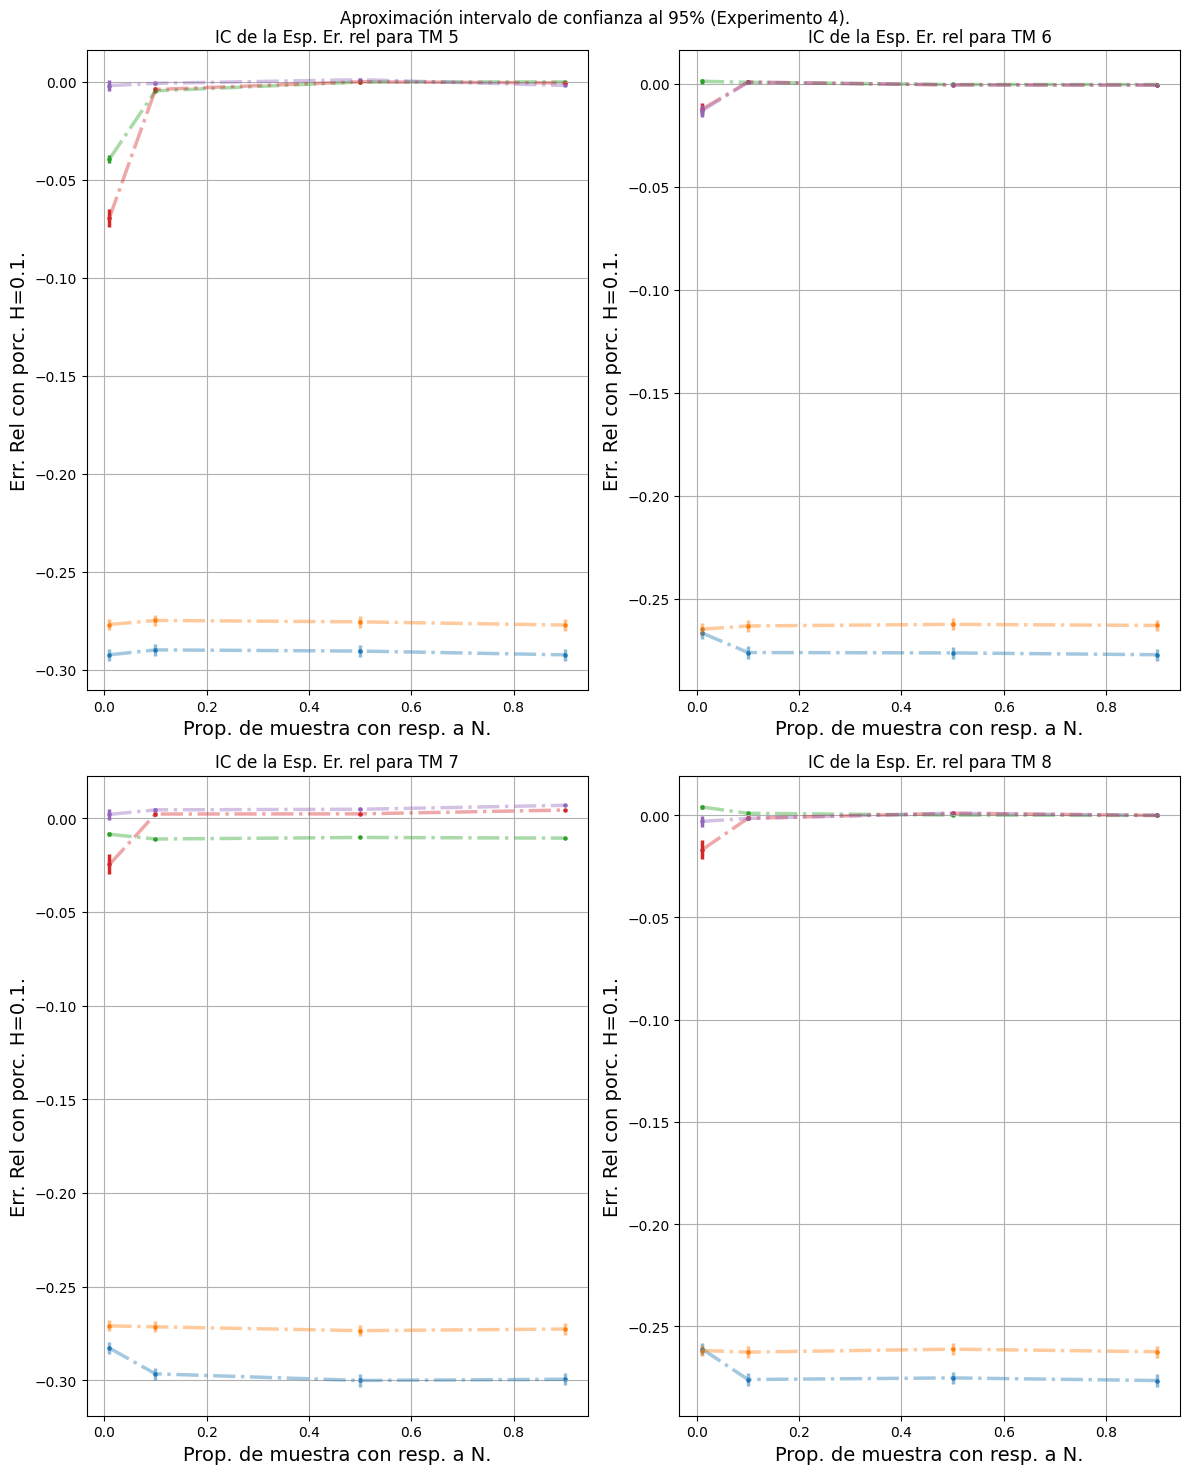

In [136]:
cond1=df_experimentacion["Metodo_infeccion"]=="DP"
cond2=df_experimentacion["Porc_infectados"]==0.1
df_contexto=df_experimentacion[cond1 & cond2]


size_figure=(12,15)
L_localization=['lower right','upper right','upper right','upper right']
NumExp="4"

L_prop_sample=[0.01,0.1,0.5,0.9]
size_inf="0.1"
factor=5
graficar_IC_Present(df_contexto,size_inf,factor,L_localization)

# H generado IP .

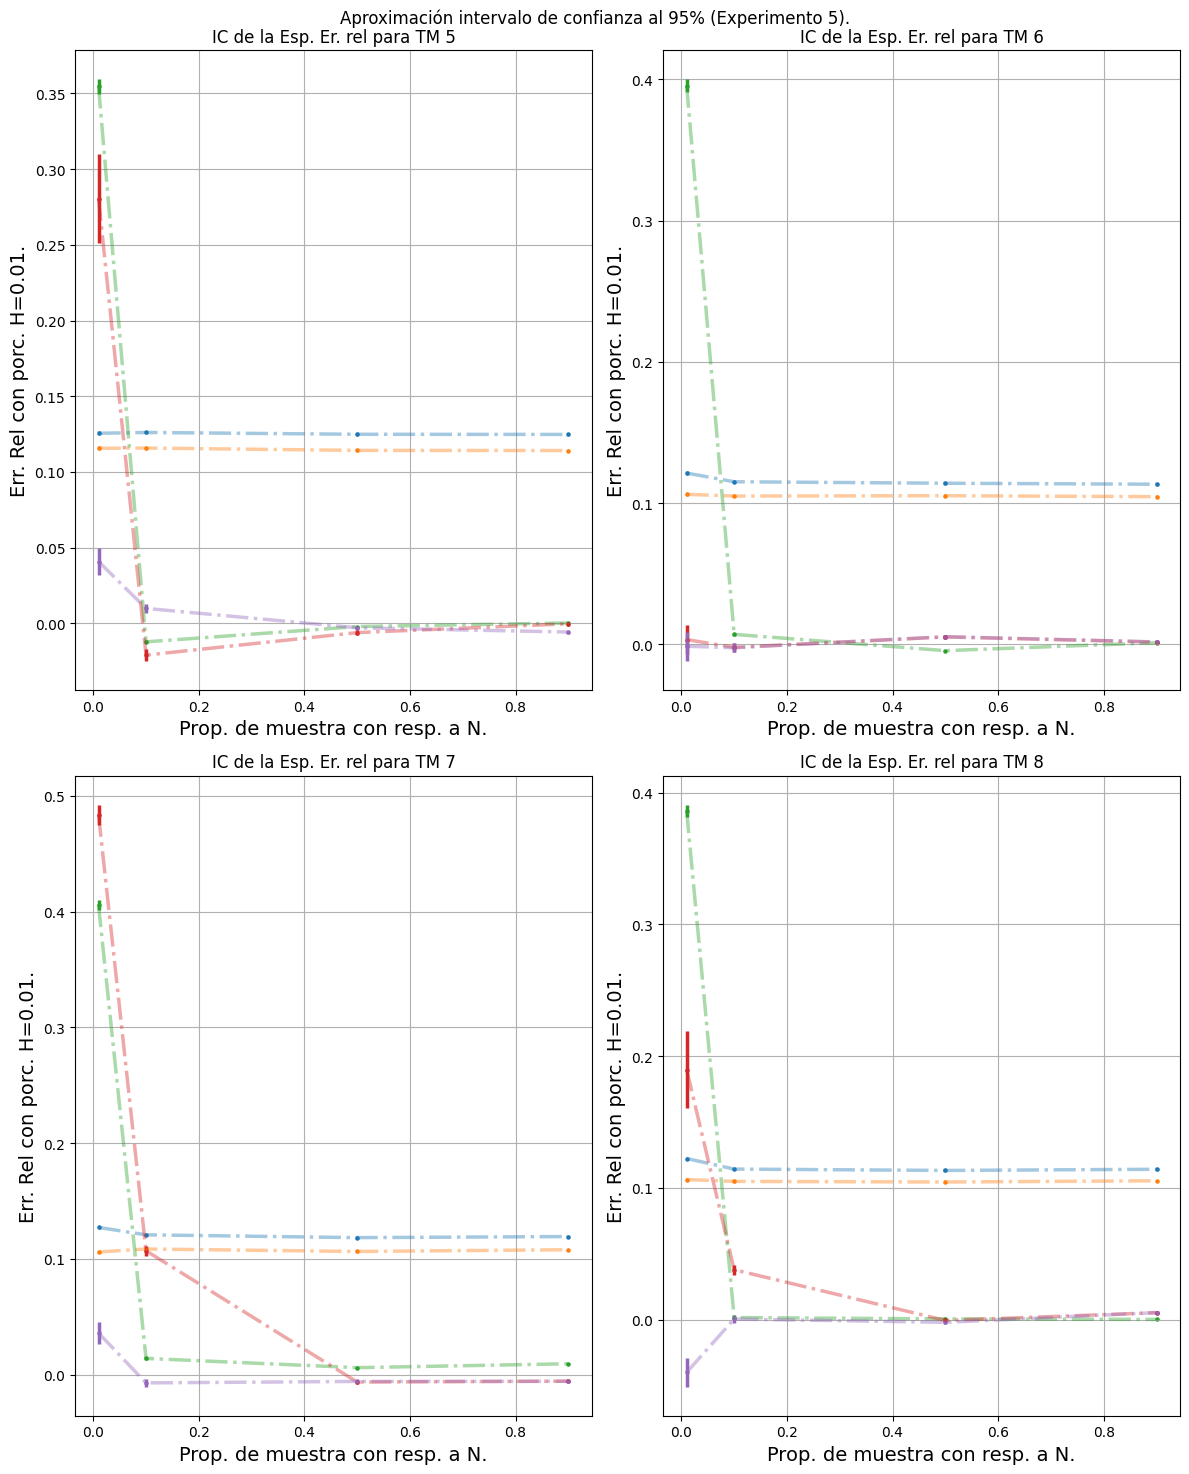

In [137]:
cond1=df_experimentacion["Metodo_infeccion"]=="IP"
cond2=df_experimentacion["Porc_infectados"]==0.01
df_contexto=df_experimentacion[cond1 & cond2]


size_figure=(12,15)
L_localization=['upper right','upper right','upper right','upper right']
NumExp="5"

L_prop_sample=[0.01,0.1,0.5,0.9]
size_inf="0.01"
factor=5
graficar_IC_Present(df_contexto,size_inf,factor,L_localization)

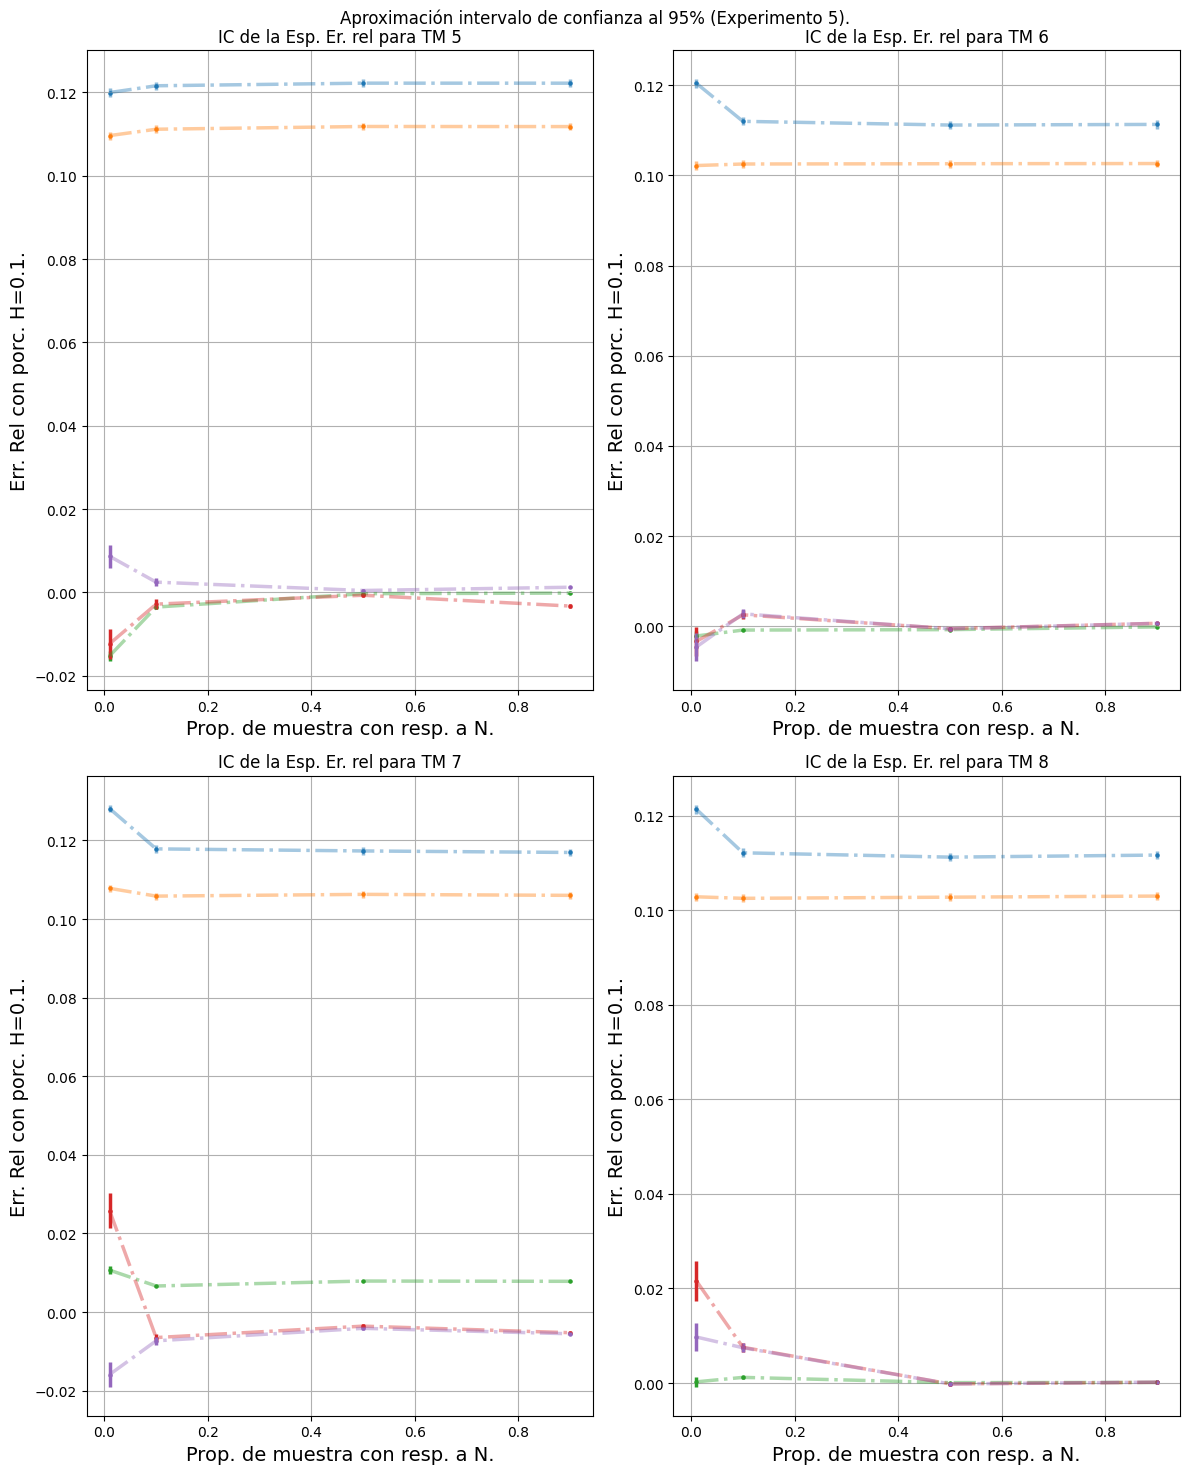

In [138]:
cond1=df_experimentacion["Metodo_infeccion"]=="IP"
cond2=df_experimentacion["Porc_infectados"]==0.1
df_contexto=df_experimentacion[cond1 & cond2]


size_figure=(12,15)
L_localization=['lower right','upper right','upper right','upper right']
NumExp="5"

L_prop_sample=[0.01,0.1,0.5,0.9]
size_inf="0.1"
factor=5
graficar_IC_Present(df_contexto,size_inf,factor,L_localization)